In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')


In [3]:
print("Total duplicates:", df.duplicated().sum())


Total duplicates: 0


In [4]:
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
print(df.describe())

        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000    33.000000  
25% 

In [7]:
print(df.shape)
print(df.columns)


(2823, 25)
Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [8]:
print(df.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [9]:
df['ADDRESSLINE2'] = df['ADDRESSLINE2'].fillna('')
df['STATE'] = df['STATE'].fillna('Unknown')
df['POSTALCODE'] = df['POSTALCODE'].fillna('Unknown')
df['TERRITORY'] = df['TERRITORY'].fillna('Unknown')


In [10]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce').dt.strftime('%Y-%m-%d')


In [11]:
print(df.isnull().sum())

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


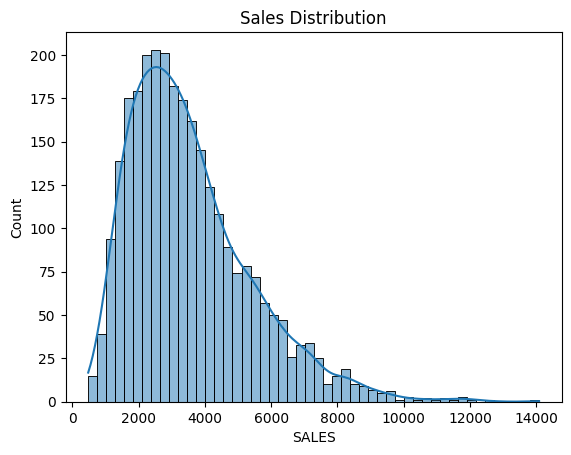

In [12]:
sns.histplot(df['SALES'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()


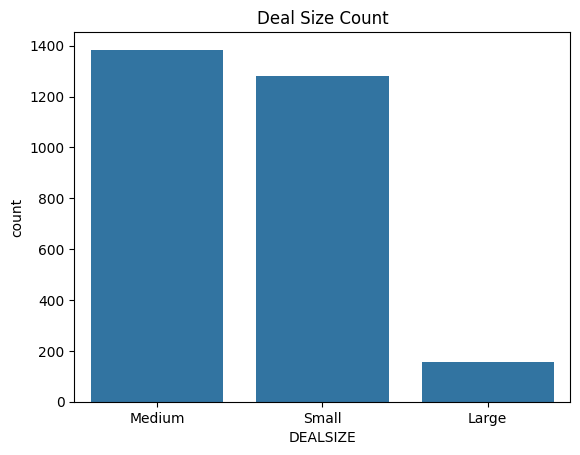

In [13]:
sns.countplot(data=df, x='DEALSIZE', order=df['DEALSIZE'].value_counts().index)
plt.title("Deal Size Count")
plt.show()


In [14]:
# Top 10 customers by total sales
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
print(top_customers)

# Top 10 products by revenue
top_products = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)
print(top_products)


CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Dragon Souveniers, Ltd.         172989.68
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
AV Stores, Co.                  157807.81
Anna's Decorations, Ltd         153996.13
Name: SALES, dtype: float64
PRODUCTCODE
S18_3232    288245.42
S10_1949    191073.03
S10_4698    170401.07
S12_1108    168585.32
S18_2238    154623.95
S12_3891    145332.04
S24_3856    140626.90
S12_2823    140006.16
S18_1662    139421.97
S12_1099    137177.01
Name: SALES, dtype: float64


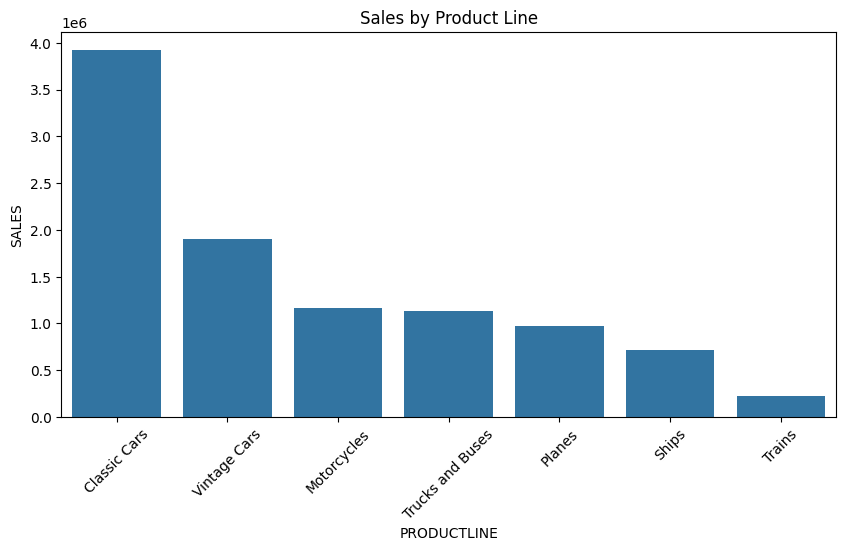

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=df.groupby('PRODUCTLINE')['SALES'].sum().reset_index().sort_values(by='SALES', ascending=False),
            x='PRODUCTLINE', y='SALES')
plt.title("Sales by Product Line")
plt.xticks(rotation=45)
plt.show()


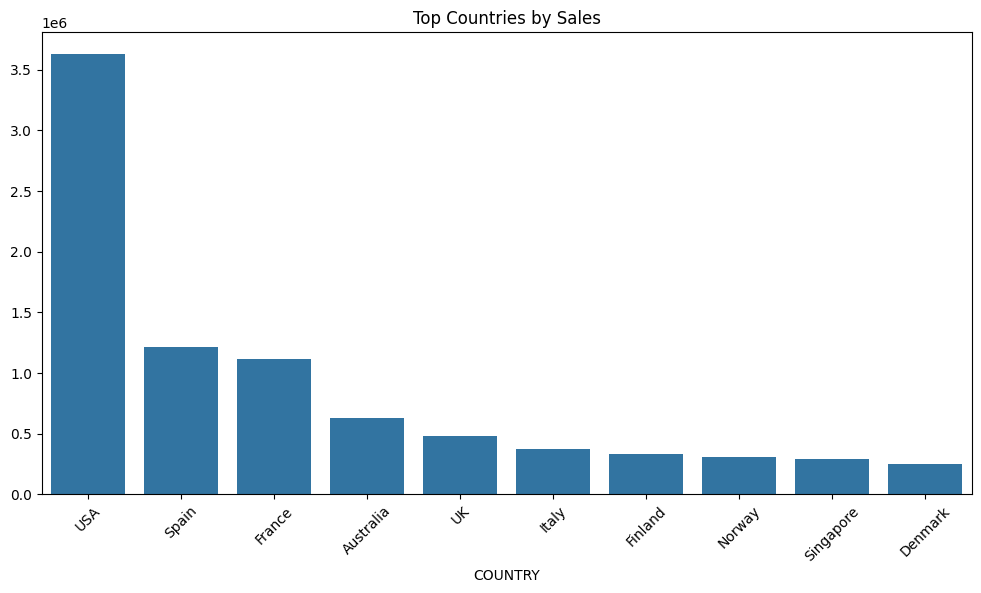

In [16]:
plt.figure(figsize=(12,6))
top_countries = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top Countries by Sales")
plt.xticks(rotation=45)
plt.show()


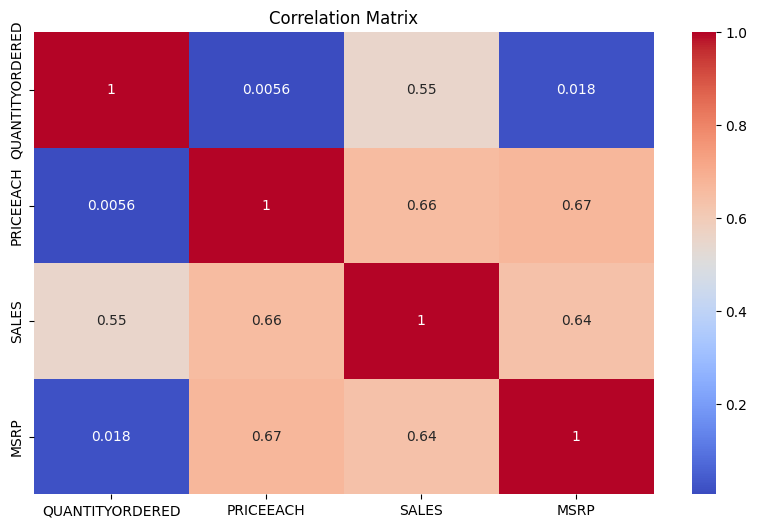

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


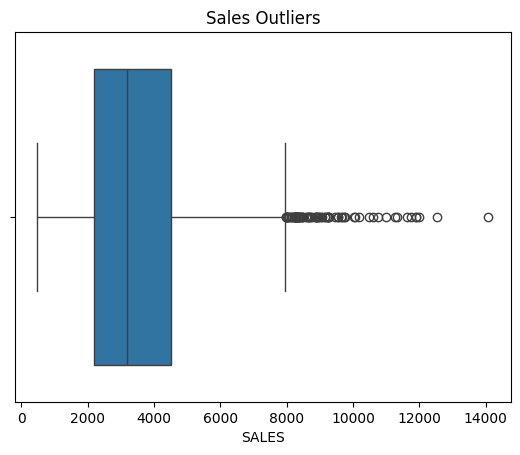

In [18]:
sns.boxplot(x=df['SALES'])
plt.title("Sales Outliers")
plt.show()


In [19]:
pip install pandas


In [20]:
import sqlite3

conn = sqlite3.connect('sales.db')
df.to_sql('sales', conn, if_exists='replace', index=False)


2823

In [21]:
query = """
SELECT
  strftime('%Y-%m', ORDERDATE) AS month,
  SUM(SALES) AS total_sales
FROM sales
GROUP BY month
ORDER BY month;
"""

monthly_sales = pd.read_sql_query(query, conn)
print(monthly_sales)


      month  total_sales
0   2003-01    129753.60
1   2003-02    140836.19
2   2003-03    174504.90
3   2003-04    201609.55
4   2003-05    192673.11
5   2003-06    168082.56
6   2003-07    187731.88
7   2003-08    197809.30
8   2003-09    263973.36
9   2003-10    568290.97
10  2003-11   1029837.66
11  2003-12    261876.46
12  2004-01    316577.42
13  2004-02    311419.53
14  2004-03    205733.73
15  2004-04    206148.12
16  2004-05    273438.39
17  2004-06    286674.22
18  2004-07    327144.09
19  2004-08    461501.27
20  2004-09    320750.91
21  2004-10    552924.25
22  2004-11   1089048.01
23  2004-12    372802.66
24  2005-01    339543.42
25  2005-02    358186.18
26  2005-03    374262.76
27  2005-04    261633.29
28  2005-05    457861.06


In [22]:
query = """
SELECT PRODUCTLINE, SUM(SALES) AS total_sales
FROM sales
GROUP BY PRODUCTLINE
ORDER BY total_sales DESC
LIMIT 5;
"""

# Run SQL and load result into DataFrame
result_df = pd.read_sql_query(query, conn)

print(result_df)

        PRODUCTLINE  total_sales
0      Classic Cars   3919615.66
1      Vintage Cars   1903150.84
2       Motorcycles   1166388.34
3  Trucks and Buses   1127789.84
4            Planes    975003.57


In [23]:
query = """
SELECT COUNTRY, TERRITORY, SUM(SALES) AS total_sales
FROM sales
GROUP BY COUNTRY, TERRITORY
ORDER BY total_sales DESC;
"""

# Run SQL and load result into DataFrame
result_df = pd.read_sql_query(query, conn)

print(result_df)

        COUNTRY TERRITORY  total_sales
0           USA   Unknown   3627982.83
1         Spain      EMEA   1215686.92
2        France      EMEA   1110916.52
3     Australia      APAC    630623.10
4            UK      EMEA    478880.46
5         Italy      EMEA    374674.31
6       Finland      EMEA    329581.91
7        Norway      EMEA    307463.70
8       Denmark      EMEA    245637.15
9        Canada   Unknown    224078.56
10      Germany      EMEA    220472.09
11       Sweden      EMEA    210014.21
12      Austria      EMEA    202062.53
13        Japan     Japan    188167.81
14    Singapore     Japan    172989.68
15  Switzerland      EMEA    117713.56
16    Singapore      APAC    115498.73
17      Belgium      EMEA    108412.62
18  Philippines     Japan     94015.73
19      Ireland      EMEA     57756.43


In [24]:
query = """
SELECT DEALSIZE, COUNT(*) AS deal_count
FROM sales
GROUP BY DEALSIZE
ORDER BY deal_count DESC;

"""

# Run SQL and load result into DataFrame
result_df = pd.read_sql_query(query, conn)

print(result_df)

  DEALSIZE  deal_count
0   Medium        1384
1    Small        1282
2    Large         157


In [25]:
query = """
SELECT DEALSIZE, SUM(SALES) AS total_sales
FROM sales
GROUP BY DEALSIZE
ORDER BY total_sales DESC;


"""

# Run SQL and load result into DataFrame
result_df = pd.read_sql_query(query, conn)

print(result_df)

  DEALSIZE  total_sales
0   Medium   6087432.24
1    Small   2643077.35
2    Large   1302119.26


In [26]:
query = """
SELECT DEALSIZE, AVG(SALES) AS avg_sales
FROM sales
GROUP BY DEALSIZE;


"""

# Run SQL and load result into DataFrame
result_df = pd.read_sql_query(query, conn)

print(result_df)

  DEALSIZE    avg_sales
0    Large  8293.753248
1   Medium  4398.433699
2    Small  2061.682800


In [27]:
query = """
SELECT DEALSIZE, PRODUCTLINE, SUM(SALES) AS total_sales
FROM sales
GROUP BY DEALSIZE, PRODUCTLINE
ORDER BY DEALSIZE, total_sales DESC;


"""

# Run SQL and load result into DataFrame
result_df = pd.read_sql_query(query, conn)

print(result_df)

   DEALSIZE       PRODUCTLINE  total_sales
0     Large      Classic Cars    796641.79
1     Large      Vintage Cars    209068.05
2     Large       Motorcycles    159144.61
3     Large            Planes     72031.70
4     Large  Trucks and Buses     56256.06
5     Large            Trains      8977.05
6    Medium      Classic Cars   2430258.39
7    Medium      Vintage Cars   1085539.96
8    Medium  Trucks and Buses    817027.68
9    Medium       Motorcycles    680369.69
10   Medium            Planes    538606.05
11   Medium             Ships    422735.07
12   Medium            Trains    112895.40
13    Small      Classic Cars    692715.48
14    Small      Vintage Cars    608542.83
15    Small            Planes    364365.82
16    Small       Motorcycles    326874.04
17    Small             Ships    291702.06
18    Small  Trucks and Buses    254506.10
19    Small            Trains    104371.02


In [28]:
query = """
WITH total AS (
  SELECT SUM(SALES) AS overall_sales FROM sales
)
SELECT
  DEALSIZE,
  SUM(SALES) AS sales_per_dealsize,
  ROUND(SUM(SALES) * 100.0 / (SELECT overall_sales FROM total), 2) AS sales_percentage
FROM sales
GROUP BY DEALSIZE
ORDER BY sales_percentage DESC;


"""

# Run SQL and load result into DataFrame
result_df = pd.read_sql_query(query, conn)

print(result_df)

  DEALSIZE  sales_per_dealsize  sales_percentage
0   Medium          6087432.24             60.68
1    Small          2643077.35             26.34
2    Large          1302119.26             12.98


In [29]:
df.to_csv('sales_data.csv', index=False)
